In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-09-03 14:32:45--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3,3M) [text/csv]
Saving to: 'AirlineTweets.csv'

     0K .......... .......... .......... .......... ..........  1% 18,5M 0s
    50K .......... .......... .......... .......... ..........  2%  329K 5s
   100K .......... .......... .......... .......... ..........  4% 5,92M 3s
   150K .......... .......... .......... .......... ..........  5% 2,47M 3s
   200K .......... .......... .......... .......... ..........  7%  421K 4s
   250K .......... .......... .......... .......... ..........  8% 1,89M 3s
   300K .......... .......... .......... .......... .......... 10% 61,1M 3s
   350K .......... .......... .......... .......... 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

<Axes: >

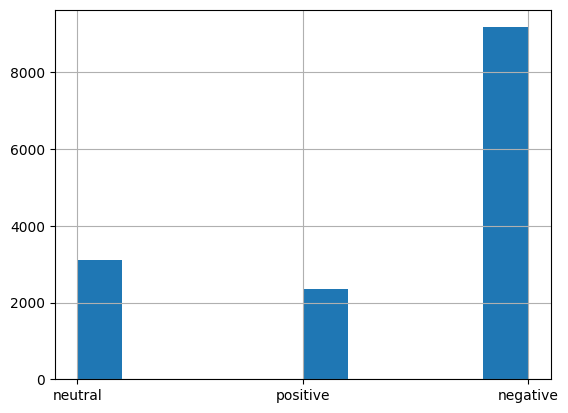

In [8]:
np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('AirlineTweets.csv')
df.head()
df['airline_sentiment'].hist()

In [22]:
df = df[df['airline_sentiment'] != 'neutral'].copy()
target_map = {'positive': 1, 'negative':0 }
df['target'] = df['airline_sentiment'].map(target_map)
df_copy = df[['text', 'target']].copy()
df_copy.head() 

,text,target
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


In [30]:
df_train,df_test = train_test_split(df_copy,random_state=42)

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Data must not be in sparse matrix before passing to tf
X_train = X_train.toarray()
X_test =X_test.toarray()

Y_train = df_train['target']
Y_test = df_test['target']

# Input dimensions
D = X_train.shape[1]

In [31]:
# Build model
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss, Dense  ==  w^T * x + b

model = Model(i,x)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
    X_train,Y_train,
    validation_data = (X_test,Y_test),
    epochs = 40,
    batch_size = 128
)

Epoch 1/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7990 - loss: 0.5733 - val_accuracy: 0.8049 - val_loss: 0.3977
Epoch 2/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8004 - loss: 0.3822 - val_accuracy: 0.8216 - val_loss: 0.3397
Epoch 3/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8203 - loss: 0.3244 - val_accuracy: 0.8406 - val_loss: 0.3025
Epoch 4/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8470 - loss: 0.2847 - val_accuracy: 0.8604 - val_loss: 0.2766
Epoch 5/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8649 - loss: 0.2558 - val_accuracy: 0.8763 - val_loss: 0.2579
Epoch 6/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8804 - loss: 0.2338 - val_accuracy: 0.8888 - val_loss: 0.2438
Epoch 7/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8960 - loss: 0.2166 - val_accuracy: 0.9012 - val_loss: 0.2330
Epoch 8/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9040 - loss: 0.2025 - val_accuracy: 0.9054 - v

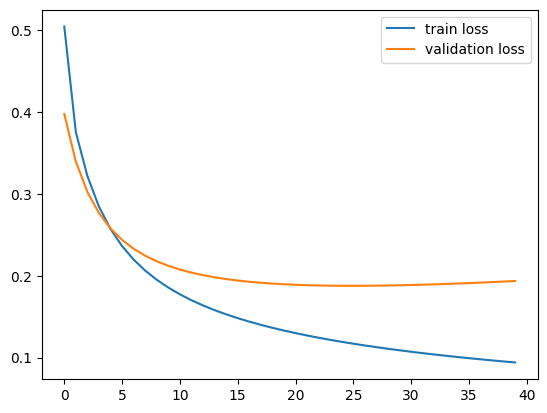

In [34]:
# plot loss per iteration

plt.plot(r.history['loss'],label = "train loss")
plt.plot(r.history['val_loss'],label = "validation loss")
plt.legend()

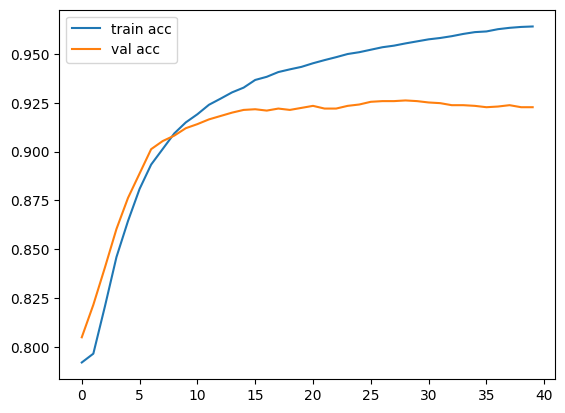

In [35]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label = "train acc")
plt.plot(r.history['val_accuracy'],label = "val acc")
plt.legend()

In [37]:
P_train = ((model.predict(X_train) >0) *1.0).flatten()
P_test = ((model.predict(X_test) >0) *1.0).flatten()

cm = confusion_matrix(Y_train,P_train,normalize='true')
cm


271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.99037199, 0.00962801],
       [0.09277778, 0.90722222]])

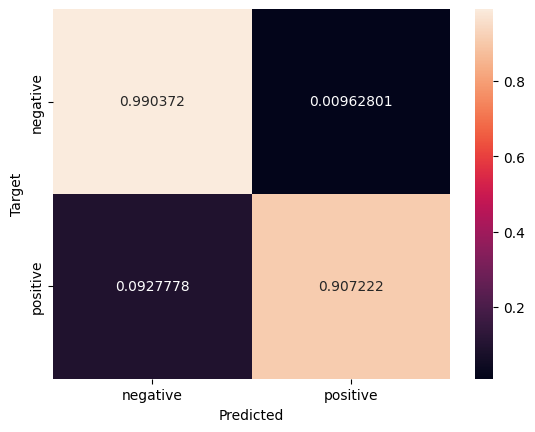

In [39]:
# plot cm
def plot_cm(cm):
    classes = ['negative','positive']
    df_cm = pd.DataFrame(cm,index=classes, columns=classes)
    ax = sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

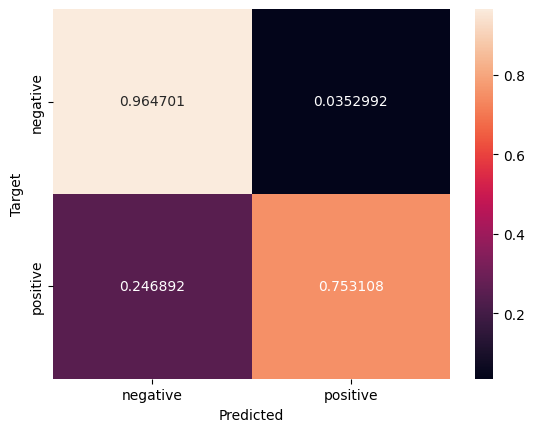

In [40]:
cm_test = confusion_matrix(Y_test,P_test,normalize='true')
plot_cm(cm_test)

In [41]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print(f"Train AUC {roc_auc_score(Y_train,Pr_train)}")
print(f"Test AUC {roc_auc_score(Y_test,Pr_test)}")

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train AUC 0.9949850879325716
Test AUC 0.954873230778171


In [44]:
print(f"Train F1 {f1_score(Y_train,P_train)}")
print(f"Test F1 {f1_score(Y_test,P_test)}")

Train F1 0.9334095455844527
Test F1 0.7932647333956969


In [47]:
model.layers

[<InputLayer name=input_layer_2, built=True>, <Dense name=dense_2, built=True>]

In [57]:
w = model.layers[1].get_weights()
word_index_map = vectorizer.vocabulary_

# check weights for each word
threshold = 2
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight > threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: -x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)
        

thank [9.761266]
thanks [9.437108]
worries [8.590424]
great [8.056279]
love [7.377885]
awesome [7.3575697]
excellent [7.183797]
kudos [6.79251]
amazing [6.4775662]
best [6.177835]


In [63]:
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight <- threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)

worst [-9.317799]
paid [-7.92855]
not [-7.773536]
rude [-7.504967]
disappointed [-7.0032444]
nothing [-6.8924623]
website [-6.8019037]
hung [-6.7201843]
instead [-6.4947352]
weren [-6.2647552]
